In [1]:
# import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('adult11.csv')
df_origin = pd.DataFrame(data)
df = df_origin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

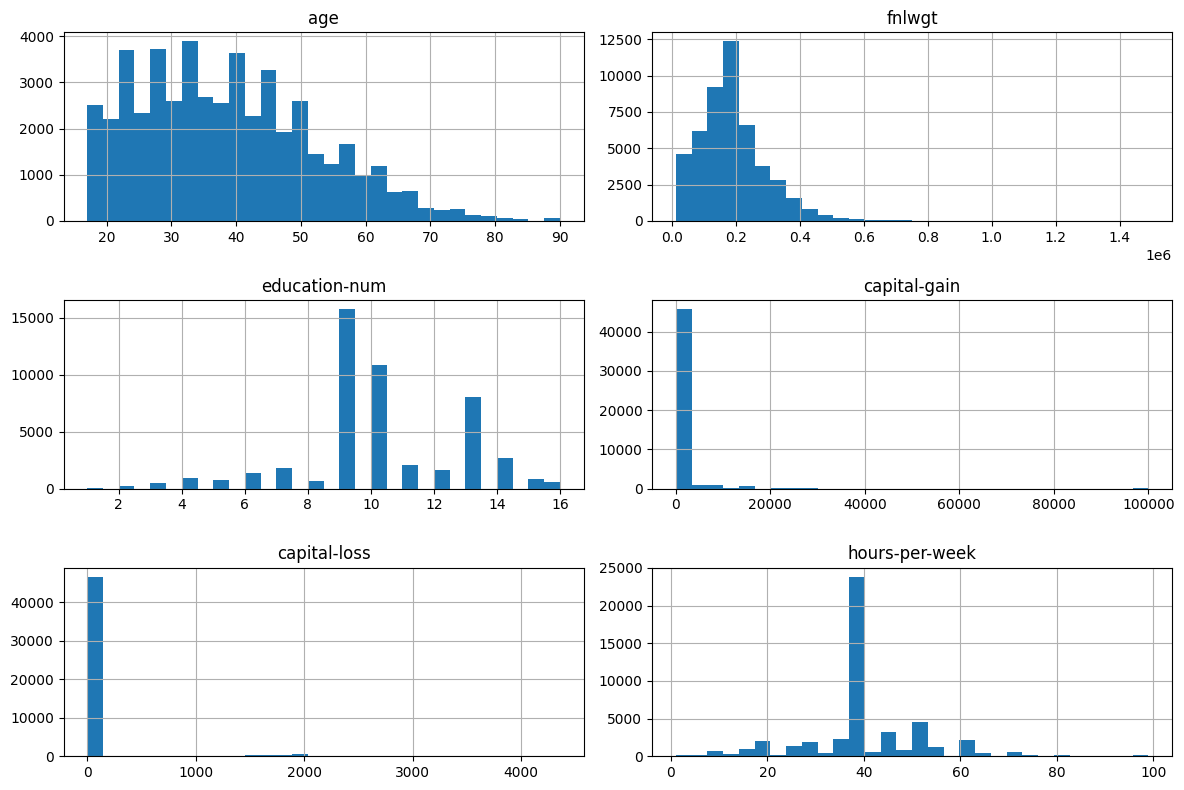

In [4]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

In [5]:
df['salary'].unique()
df['salary'] = df['salary'].replace({'<=50K': 0, '>50K': 1})

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [7]:
df[numerical_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


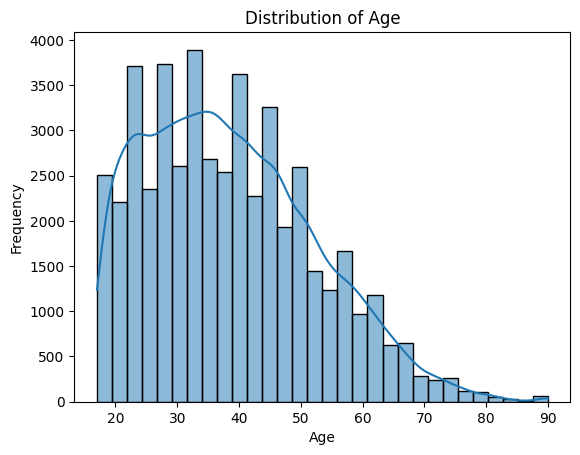

In [8]:
# col age 
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

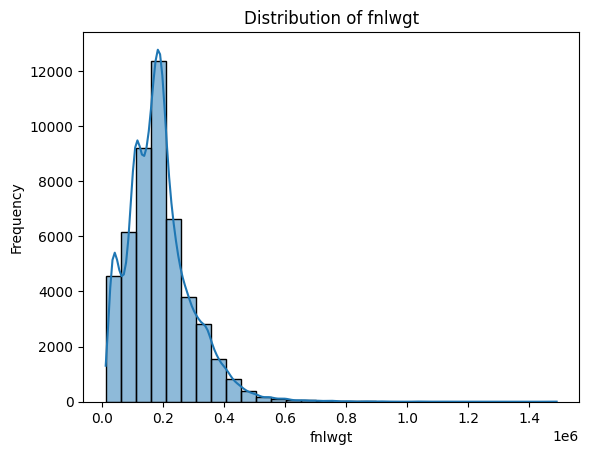

In [9]:
# col fnlwgt
sns.histplot(df['fnlwgt'], bins=30, kde=True)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

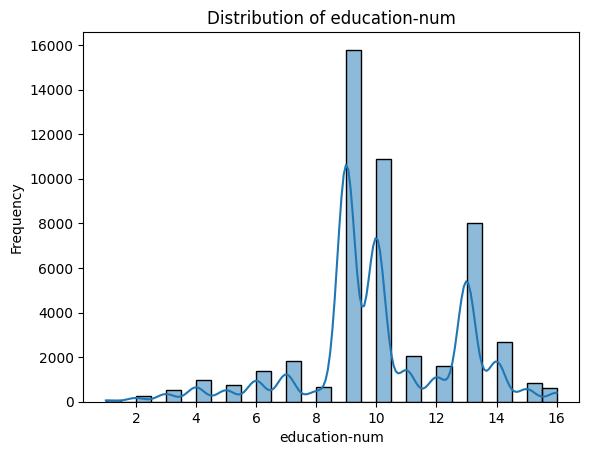

In [10]:
sns.histplot(df['education-num'], bins=30, kde=True)
plt.title('Distribution of education-num')
plt.xlabel('education-num')
plt.ylabel('Frequency')
plt.show()

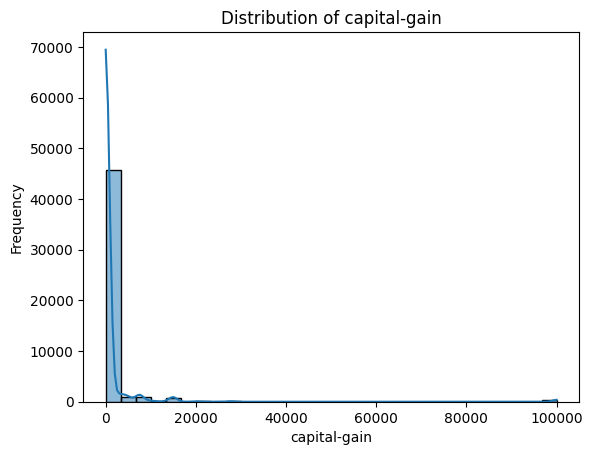

In [11]:
sns.histplot(df['capital-gain'], bins=30, kde=True)
plt.title('Distribution of capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Frequency')
plt.show()

In [12]:
from scipy.stats import zscore

z_scores = zscore(df['capital-gain'])
threshold = 3
outliers_z = df[np.abs(z_scores) > threshold]
print("Outliers in 'capital-gain' using Z-score method:")
display(outliers_z[['capital-gain']])


Outliers in 'capital-gain' using Z-score method:


,capital-gain
83,99999
298,27828
346,99999
357,99999
418,99999
...,...
48253,99999
48371,99999
48519,99999
48651,27828


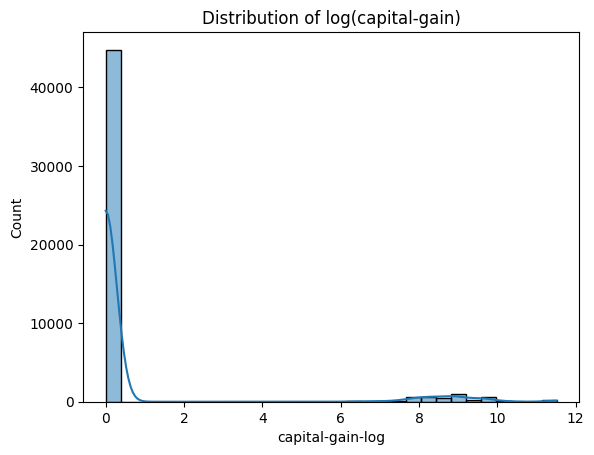

In [13]:
# Apply log1p (log(1 + x)) to handle zeros
df['capital-gain-log'] = np.log1p(df['capital-gain'])

sns.histplot(df['capital-gain-log'], bins=30, kde=True)
plt.title('Distribution of log(capital-gain)')
plt.show()

In [14]:
df['capital-gain-log']

0        0.000000
1        0.000000
2        0.000000
3        8.947546
4        0.000000
           ...   
48837    0.000000
48838    0.000000
48839    0.000000
48840    0.000000
48841    9.617471
Name: capital-gain-log, Length: 48842, dtype: float64

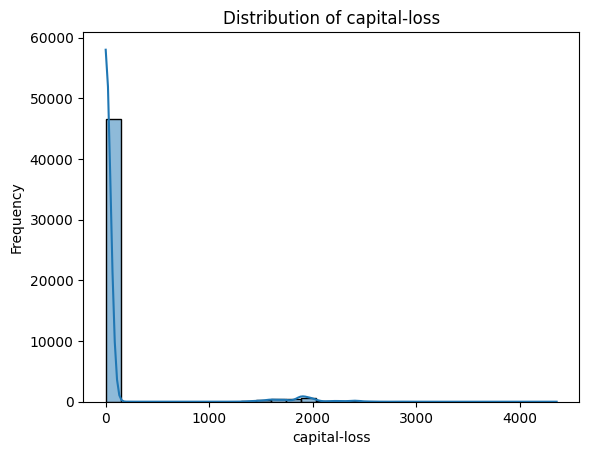

In [15]:
sns.histplot(df['capital-loss'], bins=30, kde=True)
plt.title('Distribution of capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Frequency')
plt.show()

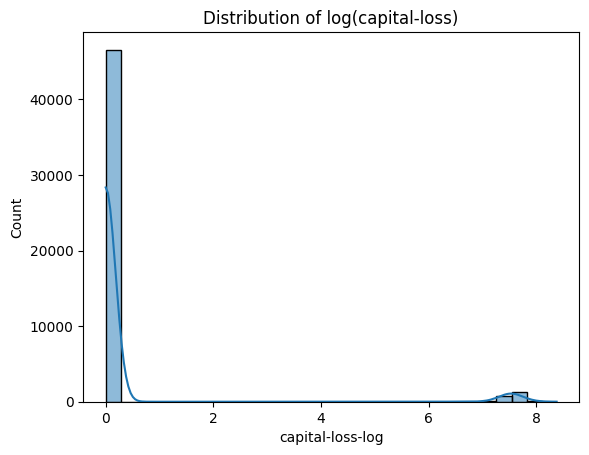

In [16]:
# Apply log1p (log(1 + x)) to handle zeros
df['capital-loss-log'] = np.log1p(df['capital-loss'])

sns.histplot(df['capital-loss-log'], bins=30, kde=True)
plt.title('Distribution of log(capital-loss)')
plt.show()

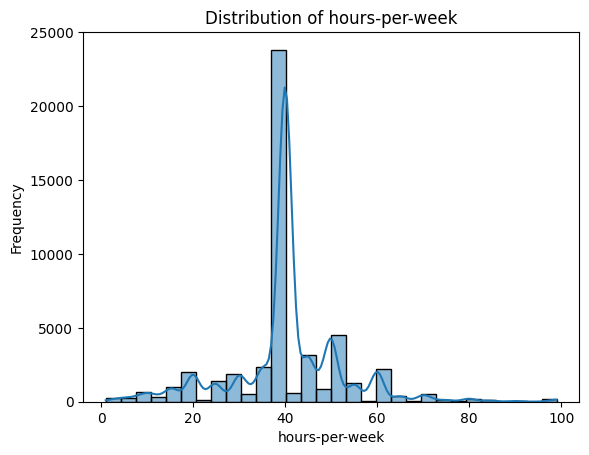

In [17]:
sns.histplot(df['hours-per-week'], bins=30, kde=True)
plt.title('Distribution of hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.select_dtypes(include=[np.number]).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary', 'capital-gain-log', 'capital-loss-log'],
      dtype='object')

In [19]:
cols_categorial = df.select_dtypes(include=[object]).columns.to_list()

In [20]:
for col in cols_categorial:
    print(f'column {col}')
    print(df[col].unique())
    print('_______________________________________')

column workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
_______________________________________
column education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
_______________________________________
column marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
_______________________________________
column occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
_______________________________________
column relationship
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
_______________________

In [21]:
from sklearn.preprocessing import LabelEncoder
cols_encoders = {}
for col in cols_categorial:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])
    cols_encoders[col] = lb


In [22]:
df['salary']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: salary, Length: 48842, dtype: int64

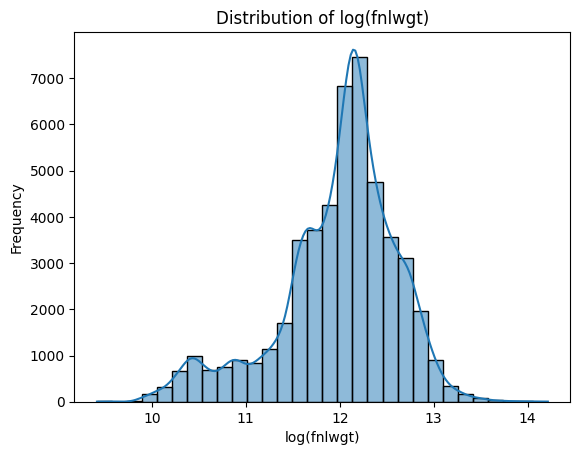

In [23]:
# Apply log1p (log(1 + x)) to handle zeros in 'fnlwgt'
df['fnlwgt-log'] = np.log1p(df['fnlwgt'])

sns.histplot(df['fnlwgt-log'], bins=30, kde=True)
plt.title('Distribution of log(fnlwgt)')
plt.xlabel('log(fnlwgt)')
plt.ylabel('Frequency')
plt.show()

In [24]:
X = df.drop(['salary','capital-loss','capital-gain','fnlwgt'], axis=1)
y = df['salary']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,capital-gain-log,capital-loss-log,fnlwgt-log
37193,42,4,15,10,2,7,0,4,1,40,39,0.0,0.0,11.885702
31093,52,6,0,6,2,3,0,4,1,35,39,0.0,0.0,12.072713
33814,34,2,11,9,2,3,0,4,1,40,39,0.0,0.0,12.059109
14500,28,4,11,9,4,1,1,4,0,40,39,0.0,0.0,11.742385
23399,46,4,8,11,4,14,1,4,1,50,39,0.0,0.0,10.254848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,4,11,9,3,8,1,2,1,40,39,0.0,0.0,13.362819
44732,34,4,15,10,2,3,0,4,1,50,39,0.0,0.0,11.586408
38158,28,4,15,10,0,4,1,4,0,40,39,0.0,0.0,12.429760
860,46,7,8,11,5,1,4,2,0,40,39,0.0,0.0,11.478883


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lg_params = {
    "max_iter": 1000,
    "solver": "lbfgs",
    "C": 1.0
}

rfc_params = {
    "n_estimators": 200,
    "max_depth":None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "sqrt",     # typical for classification
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1 
}

lg = LogisticRegression(**lg_params)
lg.fit(X_train, y_train)

rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lg = lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)
accuracy, precision, recall, f1

(0.8212713686150066,
 0.6803713527851459,
 0.4480349344978166,
 0.5402843601895735)

In [31]:
y_pred_rfc = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
accuracy, precision, recall, f1

(0.8650834271675709,
 0.7422731804586241,
 0.6502183406113538,
 0.6932029795158287)